# DSCI 552 Homework 1

Name: Ziyue Chen

Github Username: zic115

USC ID: 8823457220

## (b) Pre-Processing and Exploratory data analysis

In [1]:
# Import packages
import pandas as pd
import numpy as np
from scipy.io import arff

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Import data and generate data frame
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8') 
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
# Apply abnormal = 1 and normal = 0
class_labels = {'Abnormal': 1, 'Normal': 0}
df['class'] = df['class'].map(class_labels)
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) i. Scatterplots of the independent variables

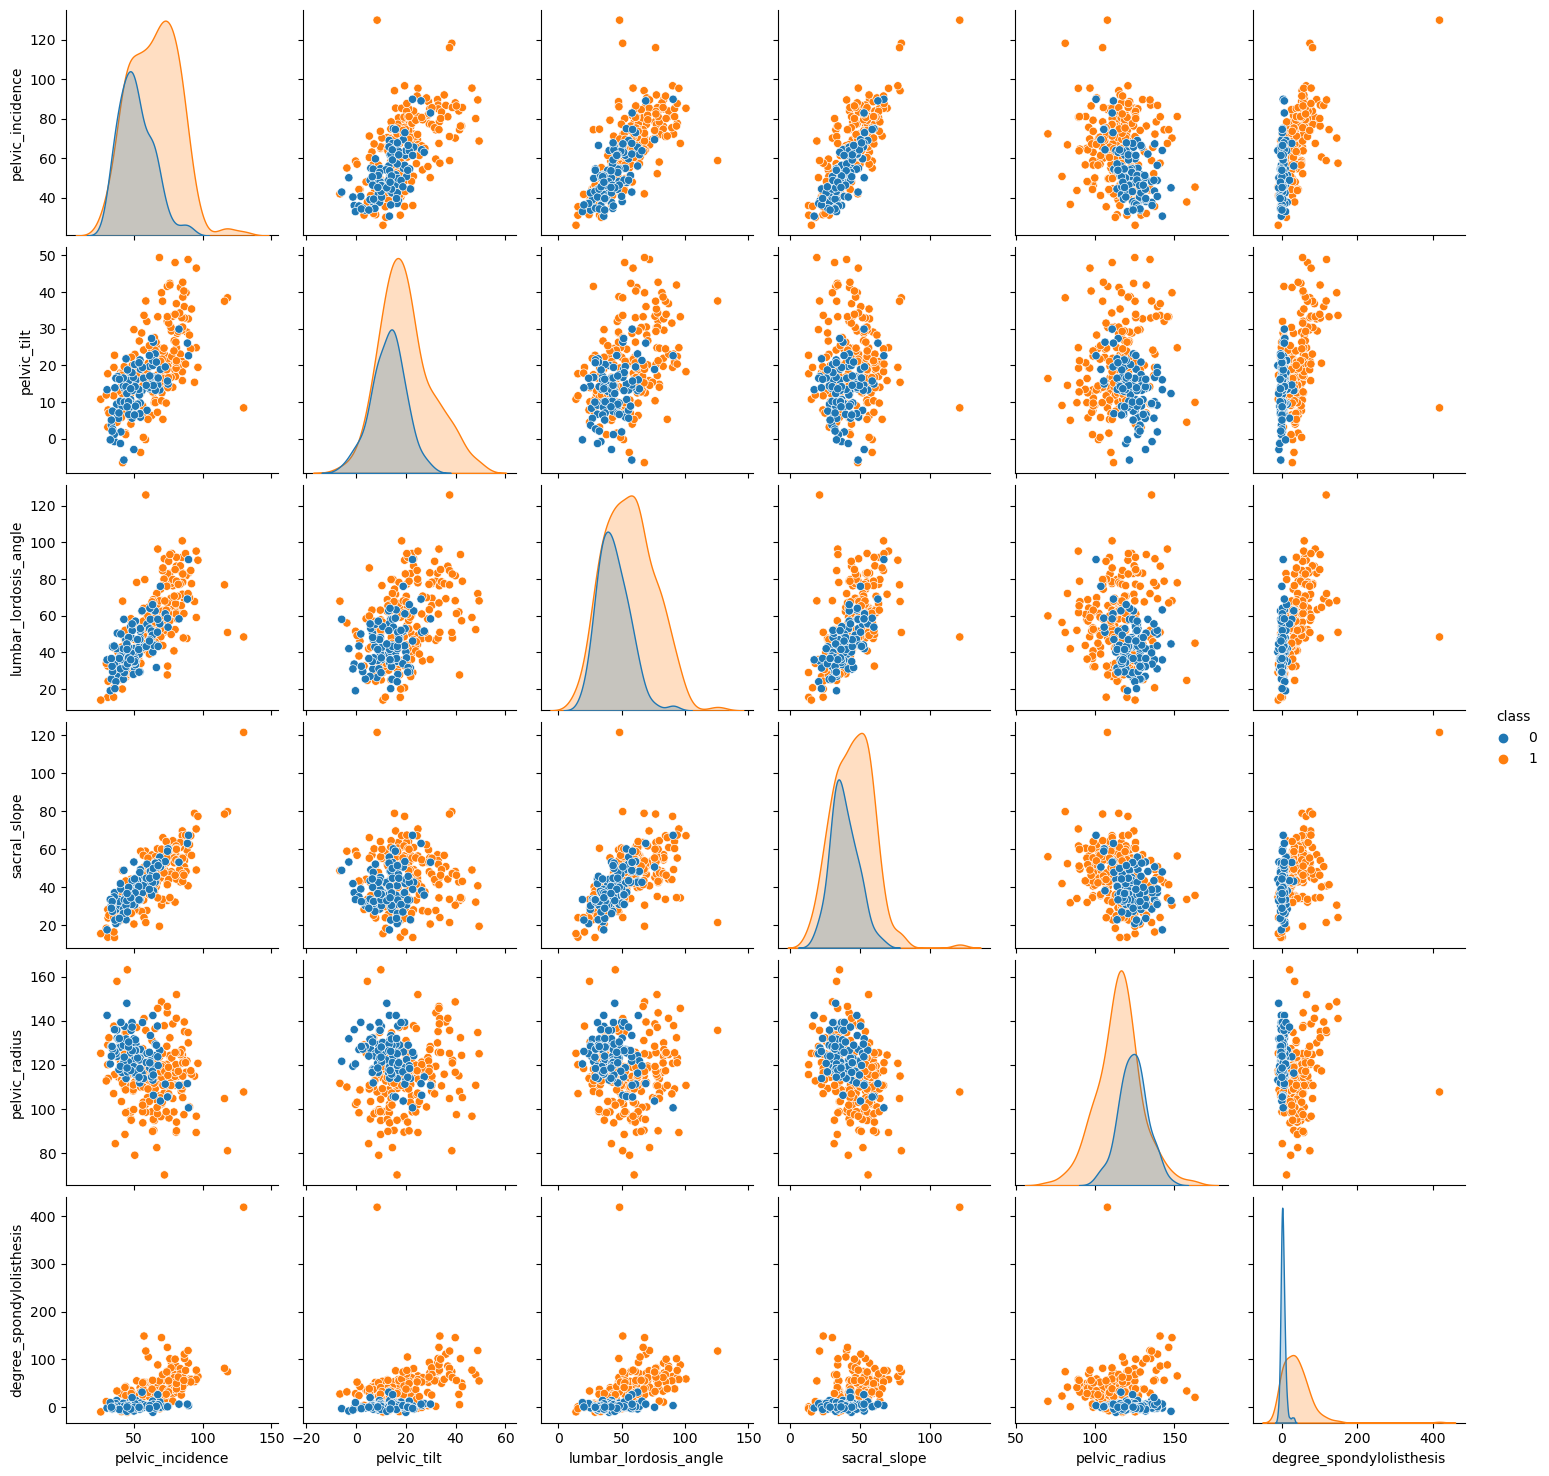

In [4]:
# Seaborn pairplot
sns.pairplot(df, hue = 'class')
plt.show()

### (b) ii. Boxplots of the independent variables

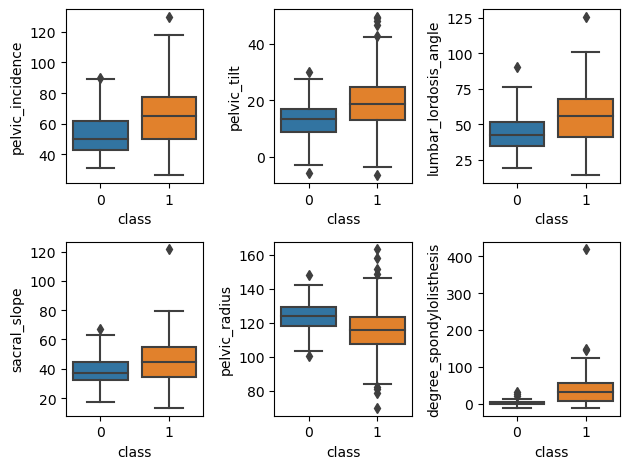

In [5]:
# Seaborn boxplot
fig, axes = plt.subplots(nrows = 2, ncols = 3)

sns.boxplot(data = df, x = 'class', y = 'pelvic_incidence', ax = axes[0,0])
sns.boxplot(data = df, x = 'class', y = 'pelvic_tilt', ax = axes[0,1])
sns.boxplot(data = df, x = 'class', y = 'lumbar_lordosis_angle', ax = axes[0,2])
sns.boxplot(data = df, x = 'class', y = 'sacral_slope', ax = axes[1,0])
sns.boxplot(data = df, x = 'class', y = 'pelvic_radius', ax = axes[1,1])
sns.boxplot(data = df, x = 'class', y = 'degree_spondylolisthesis', ax = axes[1,2])

plt.tight_layout()
plt.show()

### (b) iii. Define training set and test set

In [6]:
# Separate by class types
class_zero = df[df['class'] == 0]
class_one = df[df['class'] == 1]

# Training set comes from first 70 of Class 0 + first 140 of Class 1
class_zero_tr = class_zero.iloc[:70]
class_one_tr = class_one.iloc[:140]
tr = pd.concat([class_zero_tr, class_one_tr])

# Test set comes from the rest
class_zero_te = class_zero.iloc[70:]
class_one_te = class_one.iloc[140:]
te = pd.concat([class_zero_te, class_one_te])

## (c) Classification using KNN on Vertebral Column Data Set

### (c) ii. Test all the data, plot train and test errors, and calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

In [7]:
# Define X and y for the model
X_train = tr.iloc[:, :-1].values
y_train = tr.iloc[:, 6].values

X_test = te.iloc[:, :-1].values
y_test = te.iloc[:, 6].values

In [8]:
# Iterate for different k to get train errors and test errors
k_values = []
tr_errors = []
te_errors = []

k = 208
while k >= 1:
    # Train the model with certain k
    k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    # Predicted value for training set
    y_train_pred = knn.predict(X_train)
    # Train error
    tr_error = 1 - accuracy_score(y_train, y_train_pred)
    tr_errors.append(tr_error)
    
    # Predicted value for test set
    y_test_pred = knn.predict(X_test)
    # Test error
    te_error = 1 - accuracy_score(y_test, y_test_pred)
    te_errors.append(te_error)
    
    k -= 3

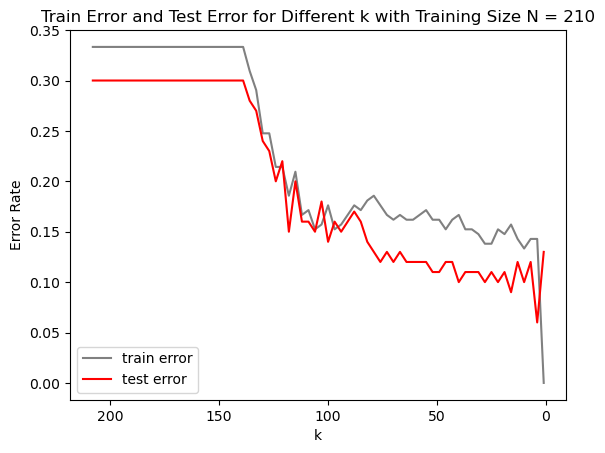

In [9]:
# Plot train error and test error
plt.plot(k_values, tr_errors, color = 'grey', label = "train error")
plt.plot(k_values, te_errors, color = 'red', label = "test error")

plt.gca().invert_xaxis()
plt.title('Train Error and Test Error for Different k with Training Size N = 210')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend(loc = "lower left")
plt.show()

In [10]:
# Find the most suitable k
opt_k = k_values[te_errors.index(min(te_errors))]
print('k* =', opt_k, 'is the most suitable k because it gives the minimum test error rate.')

k* = 4 is the most suitable k because it gives the minimum test error rate.


In [11]:
# Train the model for k = 4
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
    
y_pred = knn.predict(X_test)

In [12]:
# Confusion matrix
print('confusion matrix for k = 4:')
print(confusion_matrix(y_test, y_pred))

confusion matrix for k = 4:
[[25  5]
 [ 1 69]]


In [13]:
# True positive rate and true negative rate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tpr = tp/(tp + fn)
tnr = tn/(tn + fp)
print('ture positive rate =', tpr)
print('true negative rate =', tnr)

ture positive rate = 0.9857142857142858
true negative rate = 0.8333333333333334


In [14]:
# Precision and f1-score
print(classification_report(y_test, y_pred))
print('Class 0 has a precision of 0.96 and an f1-score of 0.89')
print('Class 1 has a precision of 0.93 and an f1-score of 0.96.')

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

Class 0 has a precision of 0.96 and an f1-score of 0.89
Class 1 has a precision of 0.93 and an f1-score of 0.96.


### (c) iii. Best test error rate for different sizes of training set

In [15]:
# Iterate for different N to get best test errors
N_values = []
best_te_errors = []

N = 10
while N <= 210:
    N_values.append(N)
    
    # Calculate Class 0 and Class 1 training sizes
    class_zero_tr_size = N // 3
    class_one_tr_size = N - class_zero_tr_size
    
    # Generate the new training set
    class_zero_tr = class_zero.iloc[:class_zero_tr_size]
    class_one_tr = class_one.iloc[:class_one_tr_size]
    tr = pd.concat([class_zero_tr, class_one_tr])
    
    # Define X and y for this new training set
    X_train = tr.iloc[:, :-1].values
    y_train = tr.iloc[:, 6].values
    
    # Iterate for different k to get test errors
    k_values = []
    te_errors = []

    k = 1
    while k <= N:
        k_values.append(k)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
    
        y_pred = knn.predict(X_test)
        te_error = 1 - accuracy_score(y_test, y_pred)
        te_errors.append(te_error)
        
        k += 5
    
    # Find the best test error for this new training set
    best_te_error = min(te_errors)
    best_te_errors.append(best_te_error)
    
    N += 10
    

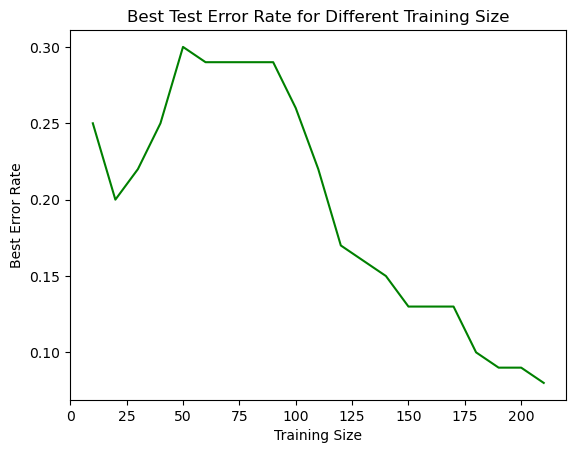

In [16]:
# Plot the best test error rate
plt.plot(N_values, best_te_errors, color = 'green')

plt.title('Best Test Error Rate for Different Training Size')
plt.xlabel('Training Size')
plt.ylabel('Best Error Rate')
plt.show()

## (d) Replace the Euclidean metric and summarize test errors

### (d) i. Minkowski Distance with different p

#### (d) i. A. Manhattan Distance with p = 1

In [17]:
# Iterate for different k to get test errors
manhattan_k_values = []
manhattan_te_errors = []

k = 1
while k <= 196:
    manhattan_k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k, p = 1, metric = 'manhattan')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    manhattan_te_error = 1 - accuracy_score(y_test, y_pred)
    manhattan_te_errors.append(manhattan_te_error)
        
    k += 5

In [18]:
# Find the most suitable k
manhattan_opt_k = manhattan_k_values[manhattan_te_errors.index(min(manhattan_te_errors))]
if manhattan_opt_k == 1:
    for i in range(1, len(manhattan_te_errors)):
        if manhattan_te_errors[i] == min(manhattan_te_errors):
            manhattan_opt_k = manhattan_k_values[i]
            break
print('k* =', manhattan_opt_k, 'is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.')

k* = 6 is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.


In [19]:
# Double check
manhattan_te_errors

[0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.10999999999999999,
 0.12,
 0.13,
 0.13,
 0.13,
 0.14,
 0.13,
 0.15000000000000002,
 0.15000000000000002,
 0.14,
 0.14,
 0.16000000000000003,
 0.15000000000000002,
 0.19999999999999996,
 0.19999999999999996,
 0.21999999999999997,
 0.20999999999999996,
 0.22999999999999998,
 0.20999999999999996,
 0.21999999999999997,
 0.24,
 0.28,
 0.28,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

In [20]:
# Record in the form of [k*, best test error rate, p]
data = {'k*': [manhattan_opt_k],
        'best test error rate': [min(manhattan_te_errors)],
        'p': [1]}
manhattan_stats = pd.DataFrame(data).rename(index = {0: 'Manhattan'})
manhattan_stats

,k*,best test error rate,p
Manhattan,6,0.11,1


#### (d) i. B. With log10(p) ∈ {0.1,0.2,0.3,...,1}

In [21]:
# With k = 6, iterate for different p to get test errors
logp_values = []
logp_te_errors = []

logp = 0.1
while logp <= 1:
    logp_values.append(logp)
    p_value = pow(10, logp)
    knn = KNeighborsClassifier(n_neighbors = 6, p = p_value)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    logp_te_error = 1 - accuracy_score(y_test, y_pred)
    logp_te_errors.append(logp_te_error)
        
    logp += 0.1
    logp = round(logp, 1)

In [22]:
# Find the best log_10(p)
opt_logp = logp_values[logp_te_errors.index(min(logp_te_errors))]
print('best log_10(p) =', opt_logp, 'because it gives the minimum test error rate.')

best log_10(p) = 0.6 because it gives the minimum test error rate.


In [23]:
# Double check
logp_te_errors

[0.08999999999999997,
 0.08999999999999997,
 0.07999999999999996,
 0.07999999999999996,
 0.07999999999999996,
 0.06000000000000005,
 0.06999999999999995,
 0.07999999999999996,
 0.08999999999999997,
 0.08999999999999997]

In [24]:
# Record in the form of [k*, best test error rate, best log_10(p)]
data = {'k*': [manhattan_opt_k],
        'best test error rate': [min(logp_te_errors)],
        'best log_10(p)': [opt_logp]}
logp_stats = pd.DataFrame(data).rename(index = {0: 'log_10(p)'})
logp_stats

,k*,best test error rate,best log_10(p)
log_10(p),6,0.06,0.6


#### (d) i. C. Chebyshev Distance with p → ∞

In [25]:
# Iterate for different k to get test errors
chebyshev_k_values = []
chebyshev_te_errors = []

k = 1
while k <= 196:
    chebyshev_k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k, p = float('inf'), metric = 'chebyshev')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    chebyshev_te_error = 1 - accuracy_score(y_test, y_pred)
    chebyshev_te_errors.append(chebyshev_te_error)
        
    k += 5

In [26]:
# Find the most suitable k
chebyshev_opt_k = chebyshev_k_values[chebyshev_te_errors.index(min(chebyshev_te_errors))]
if chebyshev_opt_k == 1:
    for i in range(1, len(chebyshev_te_errors)):
        if chebyshev_te_errors[i] == min(chebyshev_te_errors):
            chebyshev_opt_k = chebyshev_k_values[i]
            break
print('k* =', chebyshev_opt_k, 'is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.')

k* = 16 is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.


In [27]:
# Double check
chebyshev_te_errors

[0.13,
 0.09999999999999998,
 0.12,
 0.07999999999999996,
 0.10999999999999999,
 0.12,
 0.12,
 0.09999999999999998,
 0.13,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.14,
 0.10999999999999999,
 0.14,
 0.12,
 0.15000000000000002,
 0.14,
 0.18999999999999995,
 0.18000000000000005,
 0.18000000000000005,
 0.18000000000000005,
 0.20999999999999996,
 0.20999999999999996,
 0.25,
 0.28,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

In [28]:
# Record in the form of [k*, best test error rate, p]
data = {'k*': [chebyshev_opt_k],
        'best test error rate': [min(chebyshev_te_errors)],
        'p': [float('inf')]}
chebyshev_stats = pd.DataFrame(data).rename(index = {0: 'Chebyshev'})
chebyshev_stats

,k*,best test error rate,p
Chebyshev,16,0.08,inf


### (d) ii. Mahalanobis Distance

In [29]:
# Iterate for different k to get test errors
mahalanobis_k_values = []
mahalanobis_te_errors = []

k = 1
while k <= 196:
    mahalanobis_k_values.append(k)
    # Covariance matrix
    V = np.cov(X_train, rowvar = False)
    # Pseudoinverse of the covariance matrix
    VI = np.linalg.pinv(V)
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params = {'VI': VI})
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    mahalanobis_te_error = 1 - accuracy_score(y_test, y_pred)
    mahalanobis_te_errors.append(mahalanobis_te_error)
        
    k += 5

In [30]:
# Find the most suitable k
mahalanobis_opt_k = mahalanobis_k_values[mahalanobis_te_errors.index(min(mahalanobis_te_errors))]
if mahalanobis_opt_k == 1:
    for i in range(1, len(mahalanobis_te_errors)):
        if mahalanobis_te_errors[i] == min(mahalanobis_te_errors):
            mahalanobis_opt_k = mahalanobis_k_values[i]
            break
print('k* =', mahalanobis_opt_k, 'is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.')

k* = 1 is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.


In [31]:
# Now k = 1 is still gives the minimum test error rate, so I want to pick the next optimal k
mahalanobis_te_errors

[0.15000000000000002,
 0.16000000000000003,
 0.18000000000000005,
 0.17000000000000004,
 0.19999999999999996,
 0.17000000000000004,
 0.20999999999999996,
 0.20999999999999996,
 0.18999999999999995,
 0.21999999999999997,
 0.20999999999999996,
 0.20999999999999996,
 0.22999999999999998,
 0.20999999999999996,
 0.21999999999999997,
 0.20999999999999996,
 0.24,
 0.20999999999999996,
 0.24,
 0.24,
 0.24,
 0.22999999999999998,
 0.25,
 0.26,
 0.29000000000000004,
 0.29000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004,
 0.30000000000000004]

In [32]:
# 0.16000000000000003 is the next minimum test error rate and is similar to 0.15000000000000002
mahalanobis_opt_k += 5
print('k* =', mahalanobis_opt_k, 'is the most suitable k because it is the smallest k > 1 that gives the test error rate similar to the minimum test error rate.')

k* = 6 is the most suitable k because it is the smallest k > 1 that gives the test error rate similar to the minimum test error rate.


In [33]:
# Record in the form of [k*, best test error rate, p]
data = {'k*': [mahalanobis_opt_k],
        'best test error rate': [min(mahalanobis_te_errors[1:])]
       }
mahalanobis_stats = pd.DataFrame(data).rename(index = {0: 'Mahalanobis'})
mahalanobis_stats

,k*,best test error rate
Mahalanobis,6,0.16


In [34]:
# Majority polling data
majority_combined = pd.concat([manhattan_stats, logp_stats, chebyshev_stats, mahalanobis_stats])
majority_combined

,k*,best test error rate,p,best log_10(p)
Manhattan,6,0.11,1.0,NaN
log_10(p),6,0.06,NaN,0.6
Chebyshev,16,0.08,inf,NaN
Mahalanobis,6,0.16,NaN,NaN


## (e) Replace the majority polling decision by weighted decision

In [35]:
# Euclidean weighted - iterate for different k to get test errors
euclidean_weighted_k_values = []
euclidean_weighted_te_errors = []

k = 1
while k <= 196:
    euclidean_weighted_k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    euclidean_weighted_te_error = 1 - accuracy_score(y_test, y_pred)
    euclidean_weighted_te_errors.append(euclidean_weighted_te_error)
        
    k += 5

In [36]:
# Find the most suitable k
euclidean_weighted_opt_k = euclidean_weighted_k_values[euclidean_weighted_te_errors.index(min(euclidean_weighted_te_errors))]
if euclidean_weighted_opt_k == 1:
    for i in range(1, len(euclidean_weighted_te_errors)):
        if euclidean_weighted_te_errors[i] == min(euclidean_weighted_te_errors):
            euclidean_weighted_opt_k = euclidean_weighted_k_values[i]
            break
print('k* =', euclidean_weighted_opt_k, 'is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.')

k* = 6 is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.


In [37]:
# Double check
euclidean_weighted_te_errors

[0.13,
 0.09999999999999998,
 0.12,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.13,
 0.14,
 0.14,
 0.12,
 0.14,
 0.14,
 0.13,
 0.13,
 0.13,
 0.14,
 0.14,
 0.17000000000000004,
 0.18999999999999995,
 0.18999999999999995,
 0.19999999999999996,
 0.22999999999999998,
 0.25,
 0.27,
 0.27,
 0.27,
 0.27,
 0.28,
 0.28]

In [38]:
# Record in the form of [k*, best test error rate, p]
data = {'k*': [euclidean_weighted_opt_k],
        'best test error rate': [min(euclidean_weighted_te_errors)],
        'p': [2]}
euclidean_weighted_stats = pd.DataFrame(data).rename(index = {0: 'Euclidean Weighted'})
euclidean_weighted_stats

,k*,best test error rate,p
Euclidean Weighted,6,0.1,2


In [39]:
# Manhattan weighted - iterate for different k to get test errors
manhattan_weighted_k_values = []
manhattan_weighted_te_errors = []

k = 1
while k <= 196:
    manhattan_weighted_k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p = 1, metric = 'manhattan')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    manhattan_weighted_te_error = 1 - accuracy_score(y_test, y_pred)
    manhattan_weighted_te_errors.append(manhattan_weighted_te_error)
        
    k += 5

In [40]:
# Find the most suitable k
manhattan_weighted_opt_k = manhattan_weighted_k_values[manhattan_weighted_te_errors.index(min(manhattan_weighted_te_errors))]
if manhattan_weighted_opt_k == 1:
    for i in range(1, len(manhattan_weighted_te_errors)):
        if manhattan_weighted_te_errors[i] == min(manhattan_weighted_te_errors):
            manhattan_weighted_opt_k = manhattan_weighted_k_values[i]
            break
print('k* =', manhattan_weighted_opt_k, 'is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.')

k* = 26 is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.


In [41]:
# Double check
manhattan_weighted_te_errors

[0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.10999999999999999,
 0.09999999999999998,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.13,
 0.13,
 0.10999999999999999,
 0.12,
 0.14,
 0.14,
 0.13,
 0.13,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.16000000000000003,
 0.17000000000000004,
 0.18000000000000005,
 0.18999999999999995,
 0.20999999999999996,
 0.24,
 0.25,
 0.27,
 0.27,
 0.27,
 0.27,
 0.28,
 0.29000000000000004]

In [42]:
# Record in the form of [k*, best test error rate, p]
data = {'k*': [manhattan_weighted_opt_k],
        'best test error rate': [min(manhattan_weighted_te_errors)],
        'p': [1]}
manhattan_weighted_stats = pd.DataFrame(data).rename(index = {0: 'Manhatten Weighted'})
manhattan_weighted_stats

,k*,best test error rate,p
Manhatten Weighted,26,0.1,1


In [43]:
# Chebyshev weighted - iterate for different k to get test errors
chebyshev_weighted_k_values = []
chebyshev_weighted_te_errors = []

k = 1
while k <= 196:
    chebyshev_weighted_k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p = float('inf'), metric = 'chebyshev')
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    chebyshev_weighted_te_error = 1 - accuracy_score(y_test, y_pred)
    chebyshev_weighted_te_errors.append(chebyshev_weighted_te_error)
        
    k += 5

In [44]:
# Find the most suitable k
chebyshev_weighted_opt_k = chebyshev_weighted_k_values[chebyshev_weighted_te_errors.index(min(chebyshev_weighted_te_errors))]
if chebyshev_weighted_opt_k == 1:
    for i in range(1, len(chebyshev_weighted_te_errors)):
        if chebyshev_weighted_te_errors[i] == min(chebyshev_weighted_te_errors):
            chebyshev_weighted_opt_k = chebyshev_weighted_k_values[i]
            break
print('k* =', chebyshev_weighted_opt_k, 'is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.')

k* = 16 is the most suitable k because it is the smallest k > 1 that gives the minimum test error rate.


In [45]:
# Double check
chebyshev_weighted_te_errors

[0.13,
 0.13,
 0.12,
 0.10999999999999999,
 0.12,
 0.12,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.12,
 0.10999999999999999,
 0.13,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.15000000000000002,
 0.14,
 0.16000000000000003,
 0.16000000000000003,
 0.18000000000000005,
 0.18999999999999995,
 0.20999999999999996,
 0.20999999999999996,
 0.22999999999999998,
 0.26,
 0.26,
 0.26,
 0.27,
 0.27,
 0.27,
 0.28]

In [46]:
# Record in the form of [k*, best test error rate, p]
data = {'k*': [chebyshev_weighted_opt_k],
        'best test error rate': [min(chebyshev_weighted_te_errors)],
        'p': [float('inf')]}
chebyshev_weighted_stats = pd.DataFrame(data).rename(index = {0: 'Chebyshev Weighted'})
chebyshev_weighted_stats

,k*,best test error rate,p
Chebyshev Weighted,16,0.11,inf


In [47]:
# Weighted data
weighted_combined = pd.concat([euclidean_weighted_stats, manhattan_weighted_stats, chebyshev_weighted_stats])
weighted_combined

,k*,best test error rate,p
Euclidean Weighted,6,0.10,2.0
Manhatten Weighted,26,0.10,1.0
Chebyshev Weighted,16,0.11,inf


In [48]:
# Combine with majority polling data
final = pd.concat([majority_combined, weighted_combined])
final

,k*,best test error rate,p,best log_10(p)
Manhattan,6,0.11,1.0,NaN
log_10(p),6,0.06,NaN,0.6
Chebyshev,16,0.08,inf,NaN
Mahalanobis,6,0.16,NaN,NaN
Euclidean Weighted,6,0.10,2.0,NaN
Manhatten Weighted,26,0.10,1.0,NaN
Chebyshev Weighted,16,0.11,inf,NaN


## (f) Lowest training error

The lowest training error should be zero. This happens when k = 1 because each data point itself will be its nearest neighbor when the model is trained.